# MODELIZACIÓN

## IMPORTAR PAQUETES

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [82]:
ruta_proyecto = '../../'

Nombres de los ficheros de datos.

In [83]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [84]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

In [85]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20925 entries, 0 to 20924
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20925 non-null  datetime64[ns]
 1   warehouse_id                      20925 non-null  object        
 2   item_id                           20925 non-null  object        
 3   ventas_mm_8                       20925 non-null  float64       
 4   ventas_mm_7                       20925 non-null  float64       
 5   ventas_mm_6                       20925 non-null  float64       
 6   ventas_mm_9                       20925 non-null  float64       
 7   ventas_mm_2                       20925 non-null  float64       
 8   ventas_mm_10                      20925 non-null  float64       
 9   ventas_mm_5                       20925 non-null  float64       
 10  ventas_mm_3                       20925 non-nu

In [86]:
x['date'] = pd.to_datetime(x['date'])


x.head()

,date,warehouse_id,item_id,ventas_mm_8,ventas_mm_7,ventas_mm_6,ventas_mm_9,ventas_mm_2,ventas_mm_10,ventas_mm_5,...,rotura_stock_3_lag_1,rotura_stock_3_lag_1,rotura_stock_3_lag_1,rotura_stock_3_lag_1,rotura_stock_3_lag_1,month_te,year_te,wday_te,event_name_1_MartinLutherKingDay,year_2015
0,2013-01-16,CA_3,BLACK_3_090,233.38,236.00,242.50,228.33,182.00,232.50,242.00,...,0.00,0.00,0.00,0.00,0.00,25.93,30.17,24.97,0.00,0.00
1,2013-01-17,CA_3,BLACK_3_090,230.38,235.14,233.50,228.67,174.50,224.60,237.40,...,0.00,0.00,0.00,0.00,0.00,25.93,30.17,26.17,0.00,0.00
2,2013-01-18,CA_3,BLACK_3_090,227.00,224.43,226.17,223.67,180.50,222.80,201.20,...,0.00,0.00,0.00,0.00,0.00,25.93,30.17,29.55,0.00,0.00
3,2013-01-19,CA_3,BLACK_3_090,224.38,225.86,205.00,226.67,197.00,223.70,189.80,...,0.00,0.00,0.00,0.00,0.00,25.93,30.17,34.88,0.00,0.00
4,2013-01-20,CA_3,BLACK_3_090,242.88,227.43,218.50,239.67,293.00,240.20,221.00,...,0.00,0.00,0.00,0.00,0.00,25.93,30.17,34.46,0.00,0.00


## MODELIZANDO

In [87]:
y = y[y.index.isin(x.date)]
y

date
2013-01-16    191
2013-01-17    170
2013-01-18    224
2013-01-19    362
2013-01-20    255
             ... 
2015-11-26     22
2015-11-27     10
2015-11-28     17
2015-11-29      7
2015-11-30      9
Name: ventas, Length: 20925, dtype: int64

### MODELIZAR

#### Definir las variables de modelización

In [92]:
var_modelizar = x.columns.to_list()[3:]

#### Definir la validacion

Con un proyecto de series temporales no puedo hacer uno aleatorio, tengo que hacer el timeseriesplit para que sea de una secuencia, no de datos aleatorios

In [93]:
time_cv = TimeSeriesSplit(3, test_size = 8)

#### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [94]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [   {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

#### Optimizar los hiper parámetros

#####  Con random search

In [95]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(x[var_modelizar],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.19,0.10,0.00,0.00,HistGradientBoostingRegressor(),{'algoritmo': HistGradientBoostingRegressor()},-2.27,-3.24,-5.92,-3.81,1.55,1


In [96]:
modelo_final = modelo.best_estimator_.fit(x[var_modelizar],y)

In [97]:
prediccion = modelo_final.predict(x[var_modelizar])

In [99]:
temp = pd.concat([x.date.reset_index(drop=True),y.reset_index(drop=True),pd.Series(prediccion,name = 'prediccion')],axis = 1).set_index('date')

In [100]:
temp

,ventas,prediccion
date,,
2013-01-16,191,180.85
2013-01-17,170,175.74
2013-01-18,224,225.08
2013-01-19,362,292.29
2013-01-20,255,264.37
...,...,...
2015-11-26,22,7.92
2015-11-27,10,14.84
2015-11-28,17,12.63


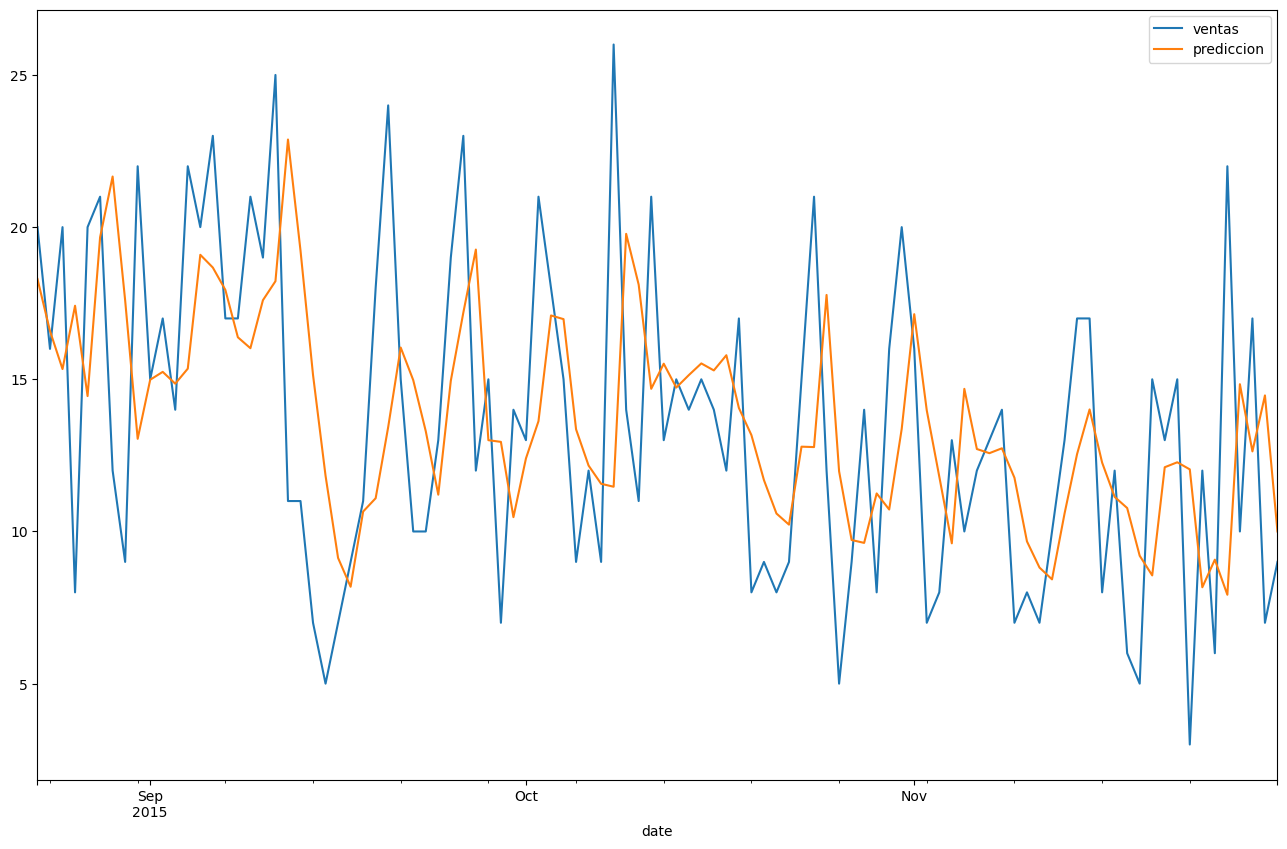

In [101]:
temp.tail(100).plot(figsize = (16,10));